# Table of Contents
 <p>

In [1]:
%pylab inline
import seaborn as sns
from scipy.io import loadmat
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = loadmat('../data/pcsk9_wfmm/WFMM_Results.mat')

In [3]:
results['Lbeta_upperCI'].shape

(4, 2076)

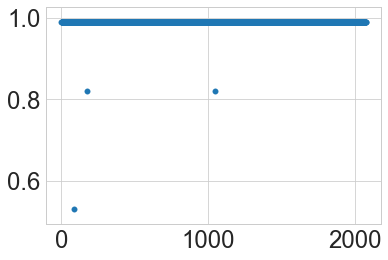

In [4]:
plt.scatter(range(1, len(results['Lbeta_simbas'][0])+1), results['Lbeta_simbas'][0])

In [5]:
results['Lbeta_simbas'][0]

array([ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99])

In [6]:
np.argmax(results['Lbeta_mean'][0])

87

In [7]:
np.argmin(results['Lbeta_simbas'][0])

86

In [8]:
results['Lbeta_simbas'][0][86]

0.5299999999999998

In [9]:
results['Lbeta_p0'][0][83]

0.014

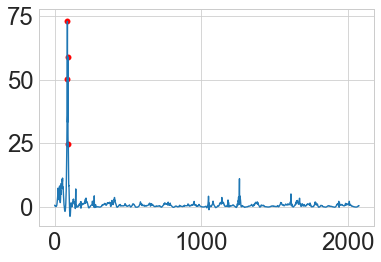

In [10]:
fig, ax = plt.subplots()
ax.plot(results['Lbeta_mean'][0])
for index, val in enumerate(results['Lbeta_p0'][0]):
    if val <0.01/len(results['Lbeta_p0'][0]):
        ax.scatter(index, results['Lbeta_mean'][0][index], color='red')

In [11]:
results = loadmat('../data/all_replicates_full_design_output.mat')

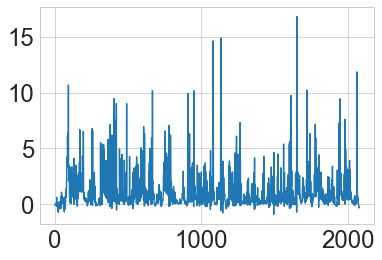

In [12]:
plt.plot(results['Lbeta_mean'][2])

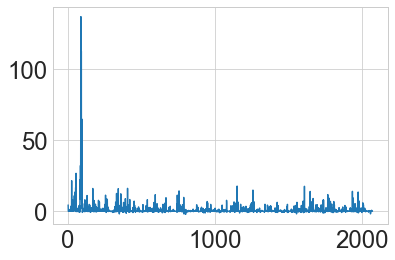

In [31]:
results = loadmat('../data/all_replicates_full_design_PC_output.mat')
plt.plot(results['Lbeta_mean'][0])

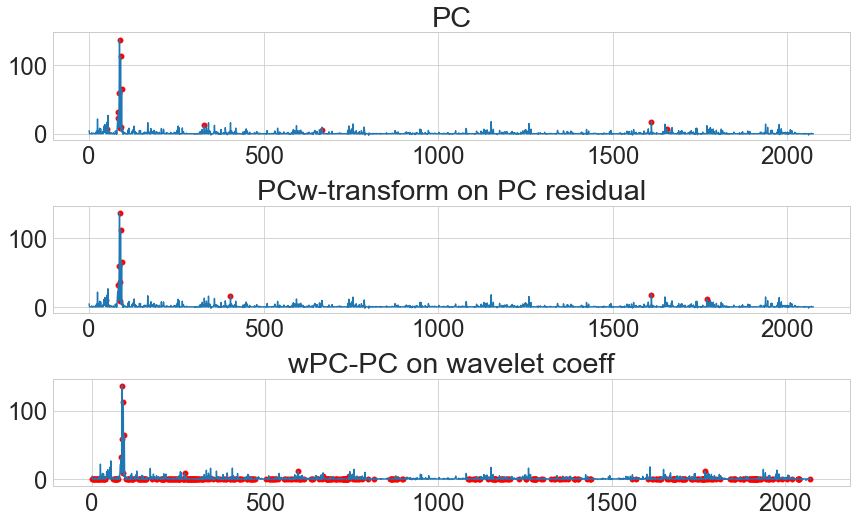

In [38]:
fig = plt.figure(figsize=(12,8))

results = loadmat('../data/all_replicates_full_design_PC_output.mat')
ax = plt.subplot(311)
ax.plot(results['Lbeta_mean'][0])
for i, val in enumerate(results['Lbeta_p0'][0]):    
    if val <0.01/len(results['Lbeta_p0'][0]):
        if results['Lbeta_mean'][0][i] > 0:
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
ax.set_title('PC')

results = loadmat('../data/all_replicates_full_design_PCw_output.mat')
ax = plt.subplot(312)
ax.plot(results['Lbeta_mean'][0])
for i, val in enumerate(results['Lbeta_p0'][0]):
    if val <0.01/len(results['Lbeta_p0'][0]):
        if results['Lbeta_mean'][0][i] > 0:
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
ax.set_title('PCw-transform on PC residual')

results = loadmat('../data/all_replicates_full_design_wPC_output.mat')
ax = plt.subplot(313)
ax.plot(results['Lbeta_mean'][0])
for i, val in enumerate(results['Lbeta_p0'][0]):
    if val <0.01/len(results['Lbeta_p0'][0]):
        if results['Lbeta_mean'][0][i] > 0:
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
ax.set_title('wPC-PC on wavelet coeff')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('PC_wavelets.png', dpi=200)

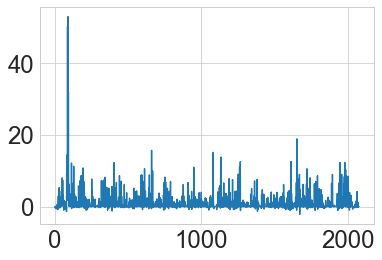

In [15]:
results = loadmat('../data/all_replicates_full_design_PCw_output.mat')
plt.plot(results['Lbeta_mean'][1])

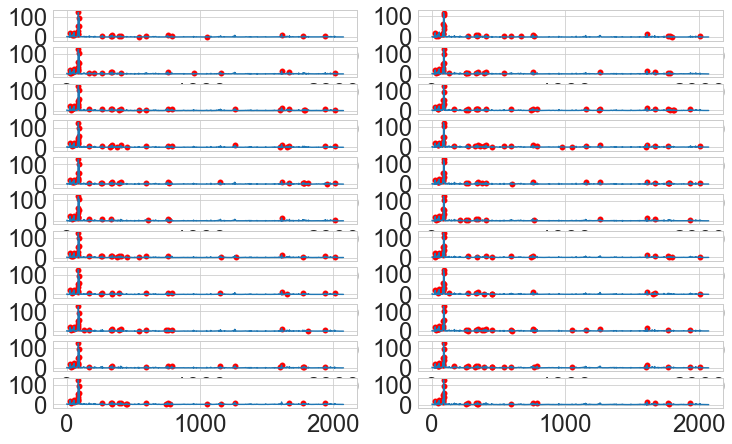

In [16]:
#wavelets = ['db2', 'db3', 'db4', 'db8', 'db9', 'db10']
wavelets = ['haar', 'db2','db3','db4','db5','db6','db7','db8','db9','db10',
            'sym2','sym3','sym4','sym5','sym6','sym7','sym8','coif1','coif2', 'coif3', 'coif4', 'coif5']            

fig = plt.figure(figsize=(12, 8))
index = 1
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    for i, val in enumerate(results['Lbeta_p0'][0]):
        if val <0.01/len(results['Lbeta_p0'][0]):
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
    ax.plot(results['Lbeta_mean'][0])
    index += 1


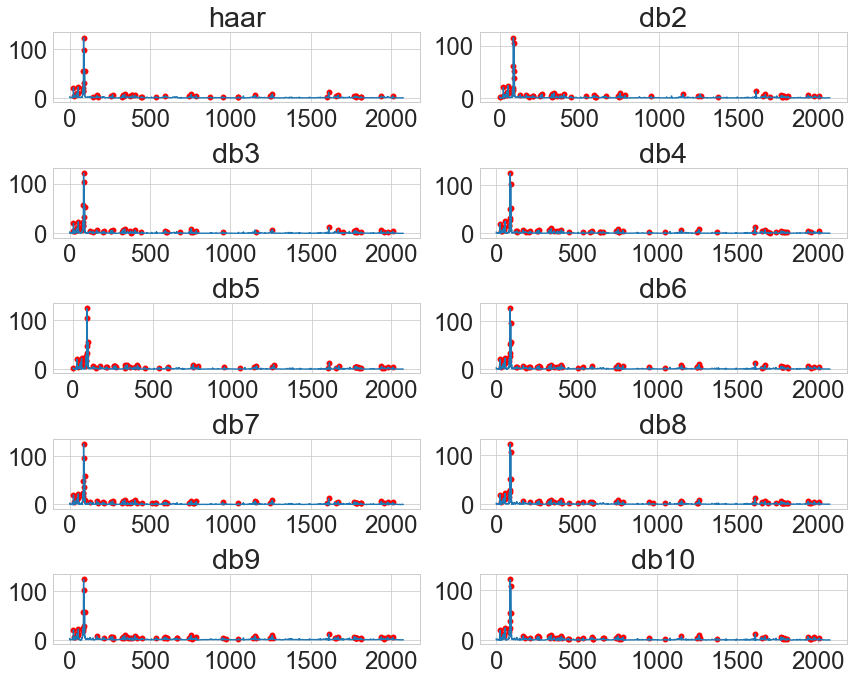

In [17]:
wavelets = ['haar', 'db2','db3','db4','db5',
            'db6','db7','db8','db9','db10']

fig = plt.figure(figsize=(12, 12))
index = 1
total_peaks = []
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][0])    
    index += 1
    peaks = 0
    for i, val in enumerate(results['Lbeta_p0'][0]):
        if val <0.01:
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
            peaks += 1
    total_peaks.append(peaks)
    ax.set_title(wavelet)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('haar_multi_coef1_peaks_noFDR.png', dpi=200)

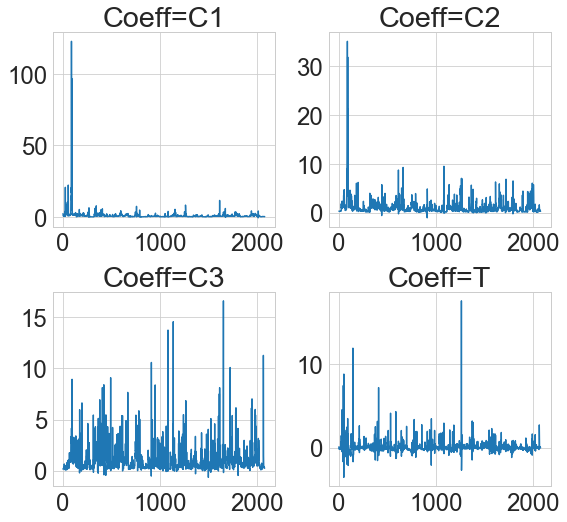

In [25]:
wavelet = 'haar'
fig = plt.figure(figsize=(8, 8))
results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
ax = plt.subplot(221)
ax.plot(results['Lbeta_mean'][0])    
ax.set_title('Coeff=C1')
ax = plt.subplot(222)
ax.plot(results['Lbeta_mean'][1])    
ax.set_title('Coeff=C2')
ax = plt.subplot(223)
ax.plot(results['Lbeta_mean'][2])    
ax.set_title('Coeff=C3')
ax = plt.subplot(224)
ax.plot(results['Lbeta_mean'][3])    
ax.set_title('Coeff=T')



fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('haar_single_allcoef_nopeaks.png', dpi=200)

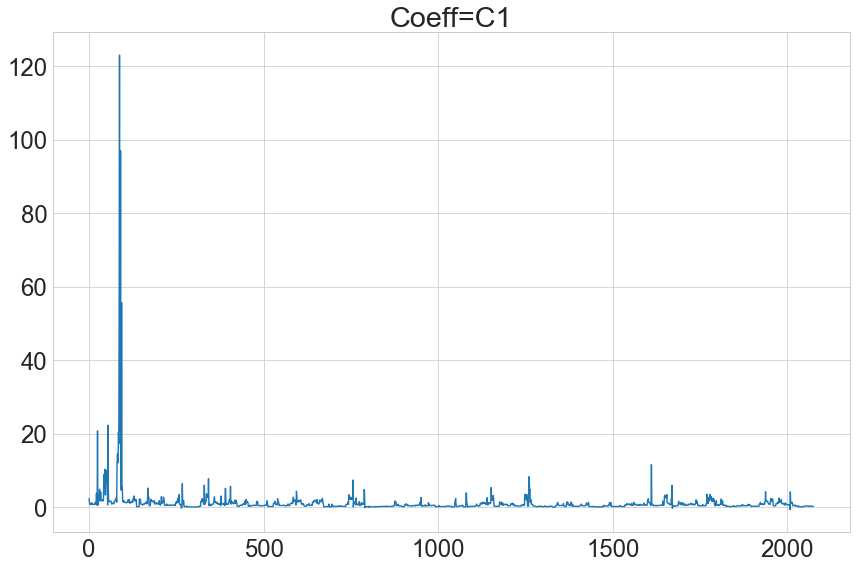

In [27]:
wavelet = 'haar'
fig = plt.figure(figsize=(12, 8))
results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
ax = plt.subplot(111)
ax.plot(results['Lbeta_mean'][0])    
ax.set_title('Coeff=C1')
fig.tight_layout()
fig.savefig('haar_single_coef1_nopeaks.png', dpi=200)


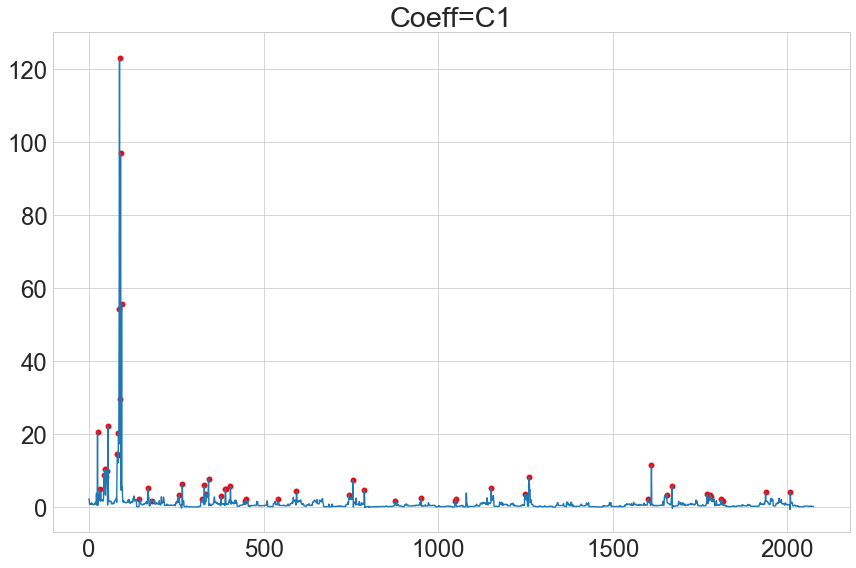

In [28]:
wavelet = 'haar'
fig = plt.figure(figsize=(12, 8))
results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
ax = plt.subplot(111)
ax.plot(results['Lbeta_mean'][0])    
for i, val in enumerate(results['Lbeta_p0'][0]):
    if val <0.01:
        ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
ax.set_title('Coeff=C1')
fig.tight_layout()
fig.savefig('haar_single_coef1_peaks_noFDR.png', dpi=200)


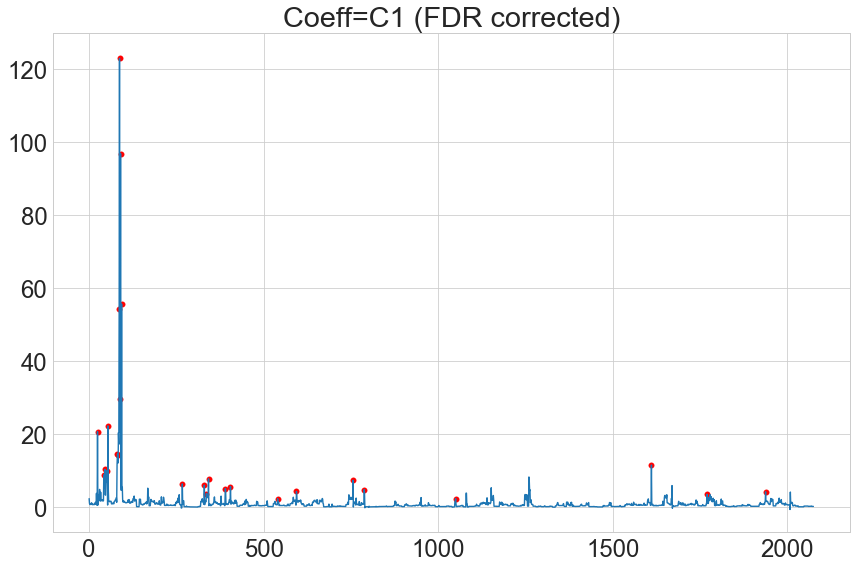

In [30]:
wavelet = 'haar'
fig = plt.figure(figsize=(12, 8))
results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
ax = plt.subplot(111)
ax.plot(results['Lbeta_mean'][0])    
for i, val in enumerate(results['Lbeta_p0'][0]):
    if val < (0.01/len(results['Lbeta_p0'][0])):
        ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
ax.set_title('Coeff=C1 (FDR corrected)')
fig.tight_layout()
fig.savefig('haar_single_coef1_peaks_FDR.png', dpi=200)


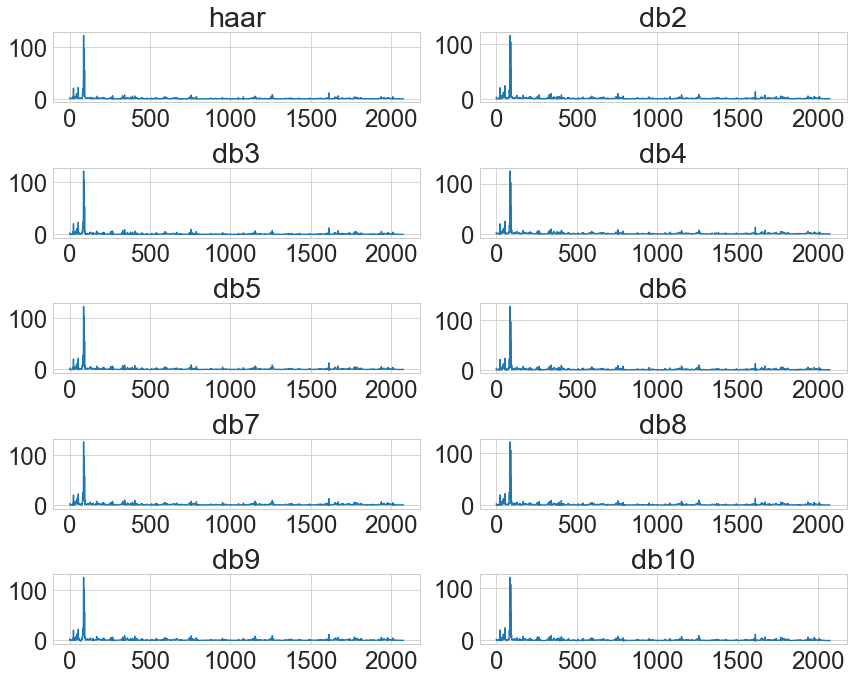

In [19]:
wavelets = ['haar', 'db2','db3','db4','db5',
            'db6','db7','db8','db9','db10']

fig = plt.figure(figsize=(12, 12))
index = 1
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][0])    
    index += 1
    ax.set_title(wavelet)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('haar_multi_coef1_nopeaks.png', dpi=200)

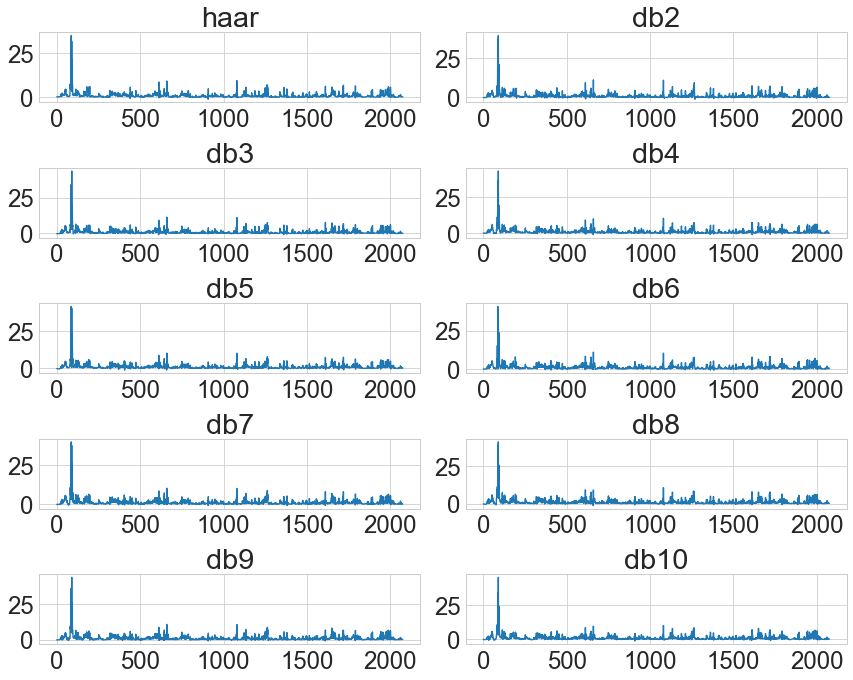

In [20]:
wavelets = ['haar', 'db2','db3','db4','db5',
            'db6','db7','db8','db9','db10']

fig = plt.figure(figsize=(12, 12))
index = 1
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][1])    
    index += 1
    ax.set_title(wavelet)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('haar_multi_coef2_nopeaks.png', dpi=200)

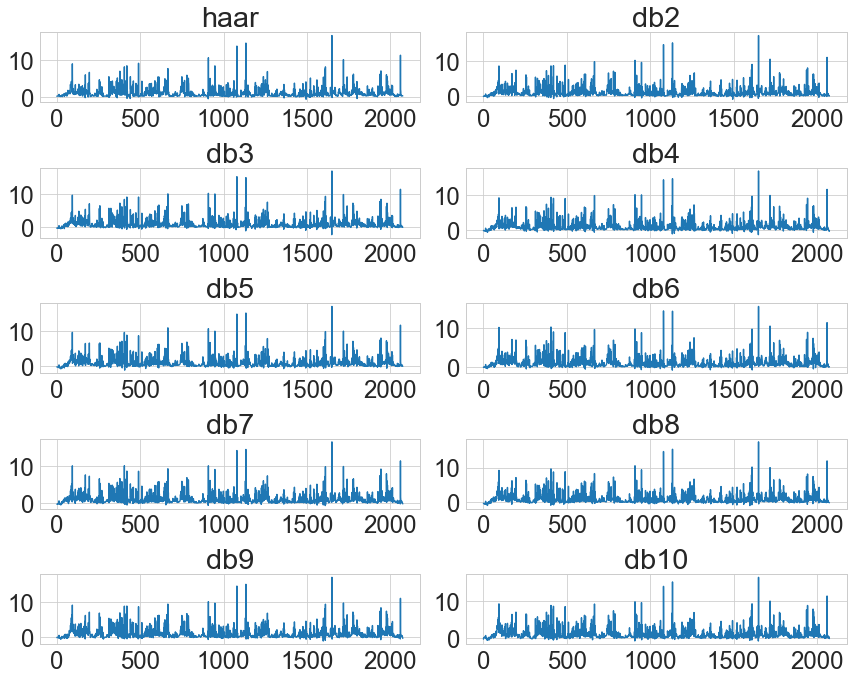

In [21]:
wavelets = ['haar', 'db2','db3','db4','db5',
            'db6','db7','db8','db9','db10']

fig = plt.figure(figsize=(12, 12))
index = 1
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][2])    
    index += 1
    ax.set_title(wavelet)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('haar_multi_coef3_nopeaks.png', dpi=200)

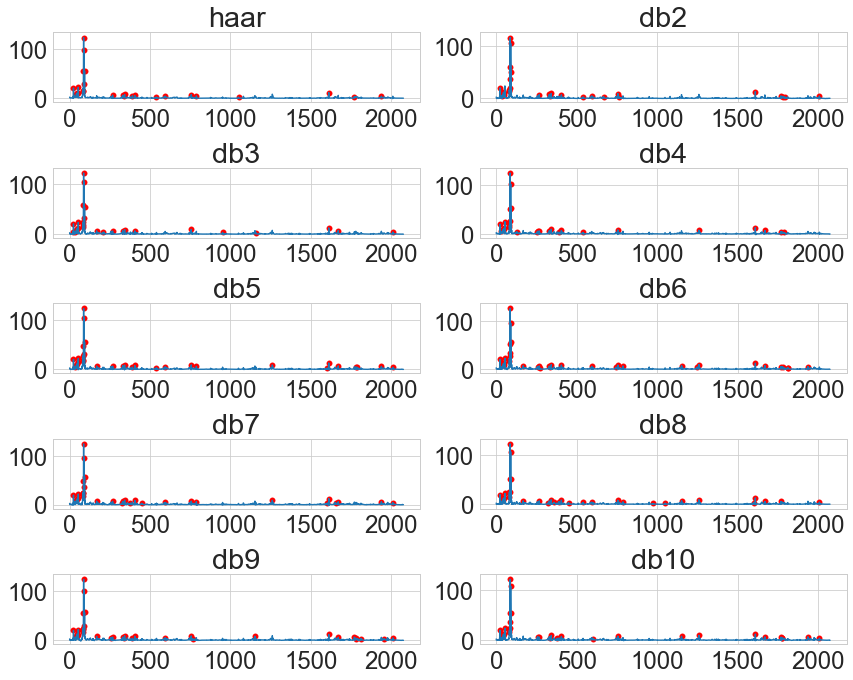

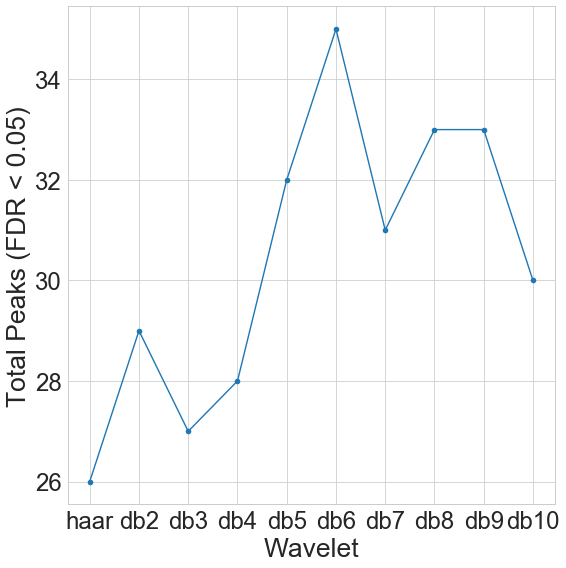

In [22]:
wavelets = ['haar', 'db2','db3','db4','db5',
            'db6','db7','db8','db9','db10']

fig = plt.figure(figsize=(12, 12))
index = 1
total_peaks = []
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][0])    
    index += 1
    peaks = 0
    for i, val in enumerate(results['Lbeta_p0'][0]):
        if val <0.01/len(results['Lbeta_p0'][0]):
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
            peaks += 1
    total_peaks.append(peaks)
    ax.set_title(wavelet)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('haar_multi_coef1_peaks.png', dpi=200)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(wavelets, total_peaks, marker='o')
ax.set_ylabel('Total Peaks (FDR < 0.05)')
ax.set_xlabel('Wavelet')
fig.tight_layout()
fig.savefig('haar_multi_coef1_total_peaks.png')

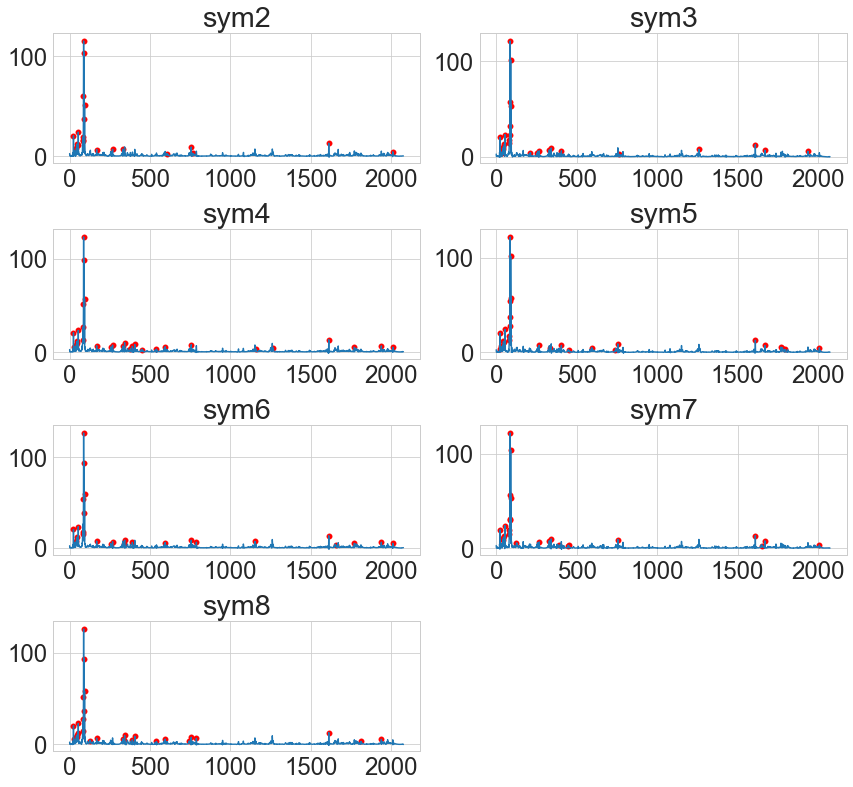

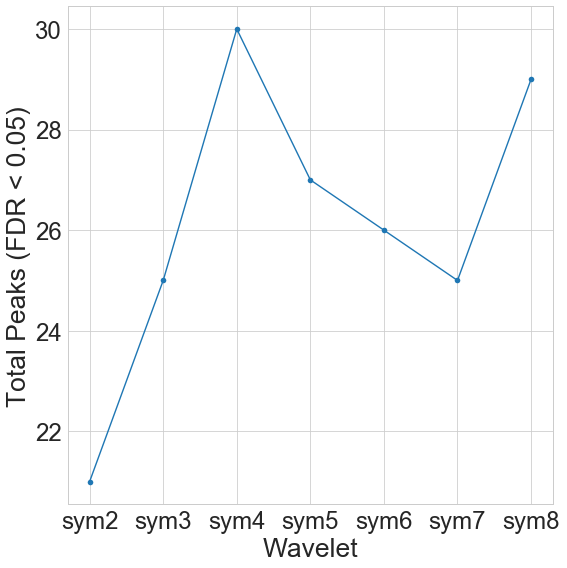

In [23]:
wavelets = ['sym2','sym3','sym4','sym5','sym6','sym7','sym8']

fig = plt.figure(figsize=(12, 12))
index = 1
total_peaks = []
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][0])    
    index += 1
    peaks = 0
    for i, val in enumerate(results['Lbeta_p0'][0]):
        if val <0.01/len(results['Lbeta_p0'][0]):
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
            peaks += 1
    ax.set_title(wavelet)
    total_peaks.append(peaks)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('sym_multi_coef1_peaks.png', dpi=200)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(wavelets, total_peaks, marker='o')
ax.set_ylabel('Total Peaks (FDR < 0.05)')
ax.set_xlabel('Wavelet')
fig.tight_layout()
fig.savefig('sym_multi_coef1_total_peaks.png')

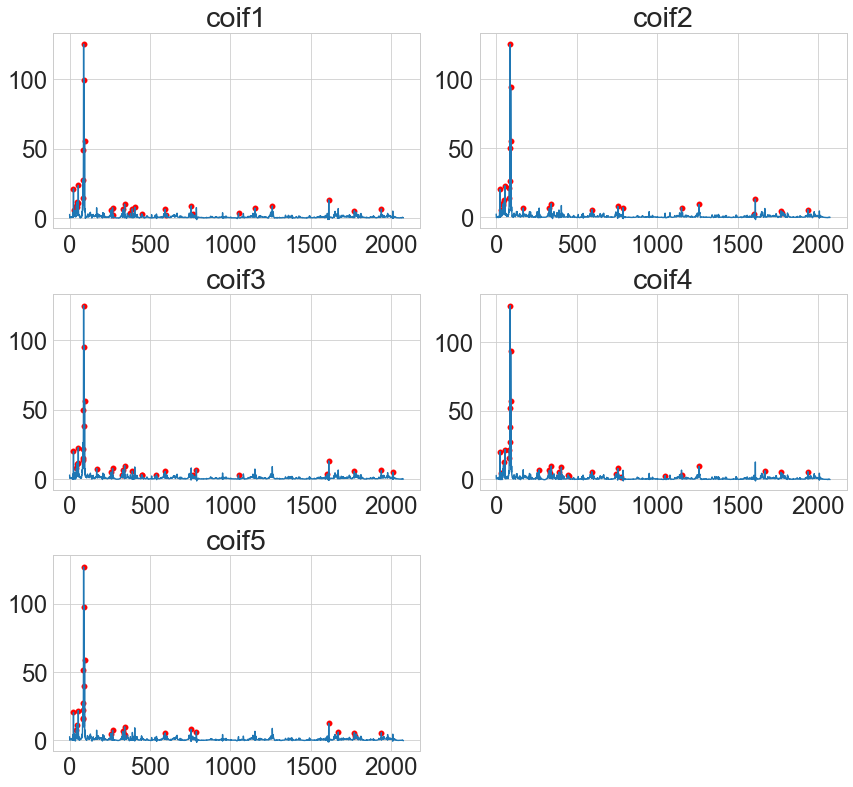

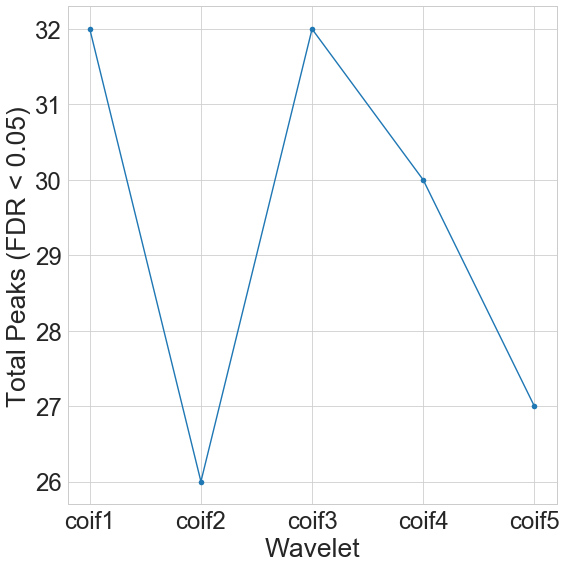

In [24]:
wavelets = ['coif1','coif2', 'coif3', 'coif4', 'coif5']

fig = plt.figure(figsize=(12, 12))
index = 1
total_peaks = []
for wavelet in wavelets:
    ax = plt.subplot(int(len(wavelets)/2)+1,2,index)
    results = loadmat('../data/all_replicates_full_design_{}_output.mat'.format(wavelet))
    ax.plot(results['Lbeta_mean'][0])    
    index += 1
    peaks = 0
    for i, val in enumerate(results['Lbeta_p0'][0]):
        if val <0.01/len(results['Lbeta_p0'][0]):
            ax.scatter(i, results['Lbeta_mean'][0][i], color='red')
            peaks += 1
    total_peaks.append(peaks)
    ax.set_title(wavelet)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('coief_multi_coef1_peaks.png', dpi=200)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(wavelets, total_peaks, marker='o')
ax.set_ylabel('Total Peaks (FDR < 0.05)')
ax.set_xlabel('Wavelet')
fig.tight_layout()
fig.savefig('coief_multi_coef1_total_peaks.png')